<h1 style='text-align: center'>Linear Regression From Scratch</h1>

<p  style='text-align: center'>
This notebook is in <span style='color: green; font-weight: 700'>Active</span> state of development!
<a style='font-weight:700' href='https://github.com/LilDataScientist'> Code on GitHub! </a></p>

<div style='text-align: center'>
    <img src='https://i.postimg.cc/9fSGwckm/islr-linear-regression-1.png' width='700' />
</div>

#### How do we present data

$i$ rows (samples), $j$ columns (features)

$$\large
X = \begin{pmatrix}
        x_{11} & \ldots & x_{1j} \\
        x_{21} & \ldots & x_{2j} \\
        \vdots &        & \vdots \\
        x_{i1} & \ldots & x_{ij} \\
        \end{pmatrix}
    \quad
    Y = \begin{pmatrix}
        y_{1} \\
        y_{2}  \\
        \vdots \\
        y_{i} \\
        \end{pmatrix}
    \quad
    W = \begin{pmatrix}
        w_{1} \\
        w_{2}  \\
        \vdots \\
        w_{j} \\
        \end{pmatrix} 
$$

#### How we compute a output

$$\large
\hat{y_i} = x_{i1}w_1 + x_{i2}w_2 + \ldots + x_{ij}w_j + b
$$

#### Loss function

$$\large
MSE = (\hat{y} - y)^{2}
\\[2ex]
\large
MSE' = 2 \cdot (\hat{y} - y)\cdot \hat{y}' = (\hat{y} - y)\cdot \hat{y}'
$$

#### Let's define column vector of outputs


$$\large
\begin{align*} 
f_{1} &= (\hat{y_1} - y_1)^{2} \\
f_{2} &= (\hat{y_2} - y_2)^{2} \\
\ldots &= \ldots \\
f_{i} &= (\hat{y_i} - y_i)^{2}
\end{align*} 
\quad
F = \begin{pmatrix}
        f_{1} \\
        f_{2}  \\
        \vdots \\
        f_{j} \\
        \end{pmatrix}
$$

#### Compute $\large \frac{\partial MSE}{\partial W}$

$$\large
        \frac{\partial F}{\partial W} = \begin{pmatrix}
        \frac{\partial f_1}{\partial w_1} & \ldots & \frac{\partial f_1}{\partial w_j}\\
        \frac{\partial f_2}{\partial w_1} & \ldots & \frac{\partial f_2}{\partial w_j}\\
        \vdots                     &        & \vdots \\
        \frac{\partial f_i}{\partial w_1} & \ldots & \frac{\partial f_i}{\partial w_j}\\
        \end{pmatrix}    
        \quad
        \frac{\partial F}{\partial W} = \begin{pmatrix}
        \frac{\partial (\hat{y_1} - y_1)^{2} }{\partial w_1} & \ldots & \frac{\partial (\hat{y_1} - y_1)^{2}}{\partial w_j}\\
        \frac{\partial (\hat{y_2} - y_2)^{2}}{\partial w_1} & \ldots & \frac{\partial (\hat{y_2} - y_2)^{2}}{\partial w_j}\\
        \vdots  &        & \vdots \\
        \frac{\partial (\hat{y_i} - y_i)^{2}}{\partial w_1} &  \ldots & \frac{\partial (\hat{y_i} - y_i)^{2}}{\partial w_j}\\
        \end{pmatrix}\\
$$

$$
\large
    \frac{\partial F}{\partial W} = \begin{pmatrix}
        \frac{\partial (\hat{y_1} - y_1)^{2} }{\partial (\hat{y_1} - y_1)} \cdot \frac{\partial (\hat{y_1} - y_1) }{\partial (\hat{y_1})} \cdot  \frac{\partial (\hat{y_1}) }{\partial w_1} & 
        \cdots &
        \frac{\partial (\hat{y_1} - y_1)^{2} }{\partial (\hat{y_1} - y_1)} \cdot \frac{\partial (\hat{y_1} - y_1) }{\partial (\hat{y_1})} \cdot  \frac{\partial (\hat{y_1}) }{\partial w_j} \\
        \frac{\partial (\hat{y_2} - y_2)^{2} }{\partial (\hat{y_2} - y_2)} \cdot \frac{\partial (\hat{y_2} - y_2) }{\partial (\hat{y_2})} \cdot  \frac{\partial (\hat{y_2}) }{\partial w_1} & 
        \cdots &
        \frac{\partial (\hat{y_2} - y_2)^{2} }{\partial (\hat{y_2} - y_2)} \cdot \frac{\partial (\hat{y_2} - y_2) }{\partial (\hat{y_2})} \cdot  \frac{\partial (\hat{y_2}) }{\partial w_j} \\
        \vdots & & \vdots \\
        \frac{\partial (\hat{y_i} - y_i)^{2} }{\partial (\hat{y_i} - y_i)} \cdot \frac{\partial (\hat{y_i} - y_i) }{\partial (\hat{y_i})} \cdot  \frac{\partial (\hat{y_i}) }{\partial w_1} & 
        \cdots &
        \frac{\partial (\hat{y_i} - y_i)^{2} }{\partial (\hat{y_i} - y_i)} \cdot \frac{\partial (\hat{y_i} - y_i) }{\partial (\hat{y_i})} \cdot  \frac{\partial (\hat{y_i}) }{\partial {w_j}}
        \end{pmatrix}
$$

$$\large
    \frac{\partial F}{\partial W} = \begin{pmatrix}
        2 \cdot (\hat{y_1} - y_1) \cdot 1 \cdot  \frac{\partial (\hat{y_1}) }{\partial w_1} & 
        \ldots & 
        2 \cdot (\hat{y_1} - y_1) \cdot 1 \cdot  \frac{\partial (\hat{y_1}) }{\partial w_j} \\
        2 \cdot (\hat{y_2} - y_2) \cdot 1 \cdot  \frac{\partial (\hat{y_2}) }{\partial w_1} & 
        \ldots & 
        2 \cdot (\hat{y_2} - y_2) \cdot 1 \cdot  \frac{\partial (\hat{y_2}) }{\partial w_j} \\
        \vdots & & \vdots \\
        2 \cdot (\hat{y_i} - y_i) \cdot 1 \cdot  \frac{\partial (\hat{y_i}) }{\partial w_1} & 
        \ldots & 
        2 \cdot (\hat{y_i} - y_i) \cdot 1 \cdot  \frac{\partial (\hat{y_i}) }{\partial w_j} \\
        \end{pmatrix}\\
$$

$$\large
    \frac{\partial F}{\partial W} = \begin{pmatrix}
        2 (\hat{y_1} - y_1) \frac{\partial (\hat{y_1}) }{\partial w_1} & 
        \ldots & 
        2 (\hat{y_1} - y_1) \frac{\partial (\hat{y_1}) }{\partial w_j} &  \\
        2 (\hat{y_2} - y_2) \frac{\partial (\hat{y_2}) }{\partial w_1} & 
        \ldots & 
        2 (\hat{y_2} - y_2) \frac{\partial (\hat{y_2}) }{\partial w_j} &  \\
        \vdots & & \vdots \\
        2 (\hat{y_i} - y_i) \frac{\partial (\hat{y_i}) }{\partial w_1} & 
        \ldots & 
        2 (\hat{y_i} - y_i) \frac{\partial (\hat{y_i}) }{\partial w_j} &  \\
        \end{pmatrix}\\
$$

$$\large
    \frac{\partial F}{\partial W} = \begin{pmatrix}
        2 (\hat{y_1} - y_1) \frac{\partial (x_{11}w_1 + x_{12}w_2 + \ldots + x_{1j}w_j + b) }{\partial w_1} & 
        \ldots & 
        2 (\hat{y_1} - y_1) \frac{\partial (x_{11}w_1 + x_{12}w_2 + \ldots + x_{1j}w_j + b) }{\partial w_j} \\
        2 (\hat{y_2} - y_2) \frac{\partial (x_{21}w_1 + x_{22}w_2 + \ldots + x_{2j}w_j + b) }{\partial w_1} & 
        \ldots & 
        2 (\hat{y_2} - y_2) \frac{\partial (x_{11}w_1 + x_{12}w_2 + \ldots + x_{1j}w_j + b) }{\partial w_j} \\
        \vdots & & \vdots \\
        2 (\hat{y_i} - y_i) \frac{\partial (x_{i1}w_1 + x_{i2}w_2 + \ldots + x_{ij}w_j + b) }{\partial w_1} & 
        \ldots & 
        2 (\hat{y_i} - y_i) \frac{\partial (x_{i1}w_1 + x_{i2}w_2 + \ldots + x_{ij}w_j + b) }{\partial w_j} \\
        \end{pmatrix}\\
$$

$$\large
\frac{\partial F}{\partial W} = \begin{pmatrix}
        2 (\hat{y_1} - y_1) x_{11} & 
        \ldots & 
        2 (\hat{y_1} - y_1) x_{1j} & \\
        2 (\hat{y_2} - y_2) x_{21} & 
        \ldots & 
        2 (\hat{y_2} - y_2) x_{2j} & \\
        \vdots & & \vdots \\
        2 (\hat{y_i} - y_i) x_{i1} & 
        \ldots & 
        2 (\hat{y_i} - y_i) x_{ij} & \\
        \end{pmatrix}
$$

$$\large
\frac{\delta F}{\delta W} = 
      \frac{2}{i} \begin{pmatrix}
        x_{11} & \ldots & x_{1j} \\
        x_{21} & \ldots & x_{2j} \\
        \vdots &               & \vdots \\
        x_{i1} & \ldots & x_{ij} \\
        \end{pmatrix}^{T}
        \begin{pmatrix}
        \hat{y_1} - y_1 \\
        \hat{y_2} - y_2 \\
        \vdots \\
        \hat{y_i} - y_i \\
        \end{pmatrix} =
        X^{T} (\hat{y} - y)
$$

#### Compute $\large \frac{\partial MSE}{\partial b}$

$$\large
        \frac{\partial F}{\partial b} = \begin{pmatrix}
        \frac{\partial f_1}{\partial b} \\
        \frac{\partial f_2}{\partial b} \\
        \vdots \\
        \frac{\partial f_i}{\partial b} \\
        \end{pmatrix}    
        \quad
        \frac{\partial F}{\partial b} = \begin{pmatrix}
        \frac{\partial (\hat{y_1} - y_1)^{2} }{\partial b} \\
        \frac{\partial (\hat{y_2} - y_2)^{2}}{\partial b} \\
        \vdots \\
        \frac{\partial (\hat{y_i} - y_i)^{2}}{\partial b} \\
        \end{pmatrix}
        \quad
        \frac{\partial F}{\partial b} = \begin{pmatrix}
        \frac{\partial (\hat{y_1} - y_1)^{2} }{\partial (\hat{y_1} - y_1)} \cdot \frac{\partial (\hat{y_1} - y_1) }{\partial (\hat{y_1})} \cdot  \frac{\partial (\hat{y_1}) }{\partial b} \\
        \frac{\partial (\hat{y_2} - y_2)^{2} }{\partial (\hat{y_2} - y_2)} \cdot \frac{\partial (\hat{y_2} - y_2) }{\partial (\hat{y_2})} \cdot  \frac{\partial (\hat{y_2}) }{\partial b}  \\
        \vdots \\
        \frac{\partial (\hat{y_i} - y_i)^{2} }{\partial (\hat{y_i} - y_i)} \cdot \frac{\partial (\hat{y_i} - y_i) }{\partial (\hat{y_i})} \cdot  \frac{\partial (\hat{y_i}) }{\partial b} \\
        \end{pmatrix} 
$$

$$\large
        \frac{\partial F}{\partial b} = \begin{pmatrix}
        2 \cdot (\hat{y_1} - y_1) \cdot 1 \cdot  \frac{\partial (\hat{y_1}) }{\partial b} \\
        2 \cdot (\hat{y_2} - y_2) \cdot 1 \cdot  \frac{\partial (\hat{y_2}) }{\partial b} \\
        \vdots \\
        2 \cdot (\hat{y_i} - y_i) \cdot 1 \cdot  \frac{\partial (\hat{y_i}) }{\partial b}
        \end{pmatrix}
        \quad
        \frac{\partial F}{\partial b} = \begin{pmatrix}
        2 (\hat{y_1} - y_1) \frac{\partial (\hat{y_1}) }{\partial b} \\
        2 (\hat{y_2} - y_2) \frac{\partial (\hat{y_2}) }{\partial b} \\
        \vdots \\
        2  (\hat{y_i} - y_i)\frac{\partial (\hat{y_i}) }{\partial b}
        \end{pmatrix}
$$

$$\large
        \frac{\partial F}{\partial b} = \begin{pmatrix}
        2 (\hat{y_1} - y_1) \frac{\partial (x_{11}w_1 + x_{12}w_2 + \ldots + x_{1j}w_j + b) }{\partial b} \\
        2 (\hat{y_2} - y_2) \frac{\partial (x_{11}w_1 + x_{12}w_2 + \ldots + x_{1j}w_j + b)}{\partial b} \\
        \vdots \\
        2 (\hat{y_i} - y_i) \frac{\partial (x_{11}w_1 + x_{12}w_2 + \ldots + x_{1j}w_j + b)}{\partial b} 
        \end{pmatrix}
        \quad
        \frac{\partial F}{\partial b} = \begin{pmatrix}
        2 (\hat{y_1} - y_1)\\
        2 (\hat{y_2} - y_2)\\
        \vdots \\
        2 (\hat{y_i} - y_i)\\
        \end{pmatrix}
$$

$$\large
\frac{\partial F}{\partial b} = \frac{2}{i}(\hat{y} - y)
$$

# Implementation of Linear Regression with Regularization

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

sns.set_theme()

In [2]:
class LinearRegression:
    def __init__(self, learning_rate=0.1, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            pred = self.predict(X)
            loss = pred - y
            
            dw = X.T @ loss
            db = loss.mean(axis=0)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        return X @ self.weights + self.bias

# Generate data

We will be using only one feature with index 2

In [3]:
X, y = datasets.load_diabetes(return_X_y=True)

X = X[:, [2]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

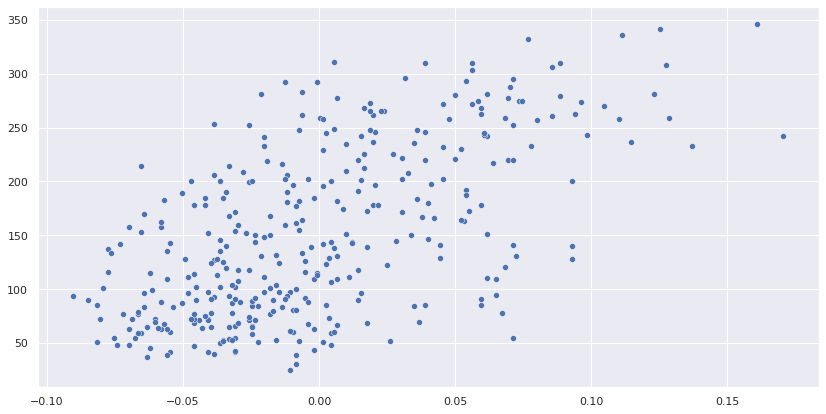

In [4]:
fig, ax = plt.subplots(figsize=(14, 7))

sns.scatterplot(x=X_train[:, 0], y=y_train, ax=ax);

# Run model

In [5]:
model = LinearRegression(n_iters=10000)
model.fit(X_train, y_train)
MSE = mean_squared_error(y_test, model.predict(X_test))
print('MSE: {}'.format(MSE))

MSE: 4150.680189329983


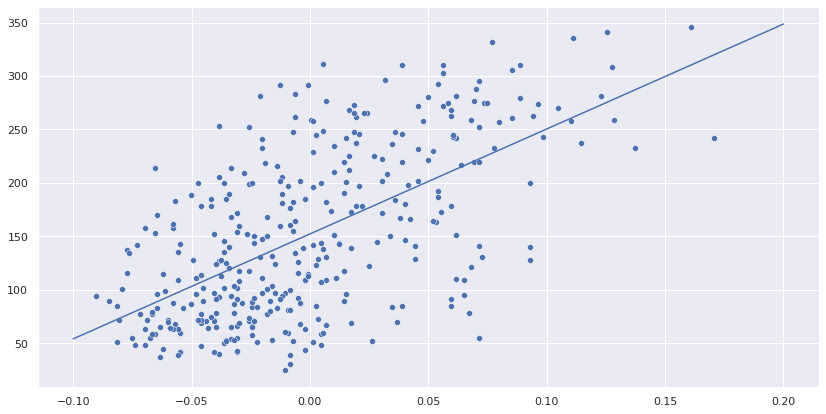

In [6]:
x_values = np.linspace(-0.1, 0.2, 100)
y_values = [model.bias + model.weights[0] * x for x in x_values]

fig, ax = plt.subplots(figsize=(14, 7))

sns.scatterplot(x=X_train[:, 0], y=y_train, ax=ax);
sns.lineplot(x=x_values, y=y_values);